# Assigment 1

## The assignment is divided into programming and mathematical questions. Both of them are given in this notebook.

## Programming questions: I am giving you a template that you can use to write your code. Description of the questions is integrated in the comments.

## Upload your code on Learn dropbox and submit pdfs of the code and answers to the mathematical questions on Crowdmark.

## -----------------------------------------------------------------------------------------------------------

## Programming Questions

## Load modules

In [2]:
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.transform import resize

# Numpy is useful for handling arrays and dense matrices (a matrix with a lot of nonzeros).
import numpy as np

## Load image

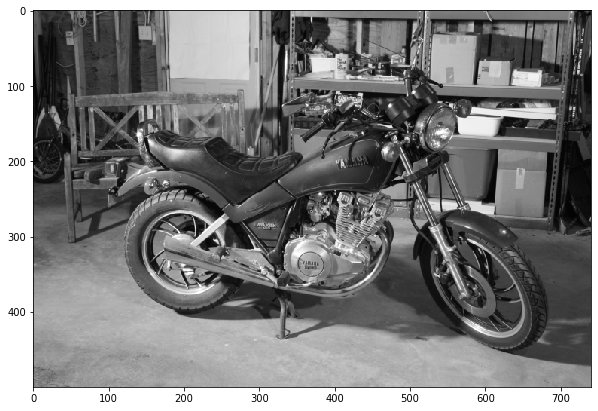

In [3]:
img = data.stereo_motorcycle()[0]
img = rgb2gray(img)*255 # convert to gray and change scale from (0,1) to (0,255).

m = img.shape[0]
n = img.shape[1]

plt.figure(1, figsize=(10, 10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Question 1: compute the differences operators here. Note that the image is not a square image. Marks: 10/100

In [12]:
# You will need these three methods to construct the sparse differences operators.
# If you do not use sparse operators you might have memory problems.
from scipy.sparse import diags
from scipy.sparse import kron
from scipy.sparse import identity

# Start coding here.
diagonals = [-1,1]
j_h = diags(diagonals, [0,1], shape=(m,m), format=None, dtype=int)
i_h = identity(n, int)
d_h = kron(j_h, i_h) 

j_v = diags(diagonals, [0,1], shape=(n,n), format=None, dtype=int)
i_v = identity(m, int)
d_v = kron(i_v, j_v) 

## Question 2: visualize the differences operators applied on the image. Marks: 5/100

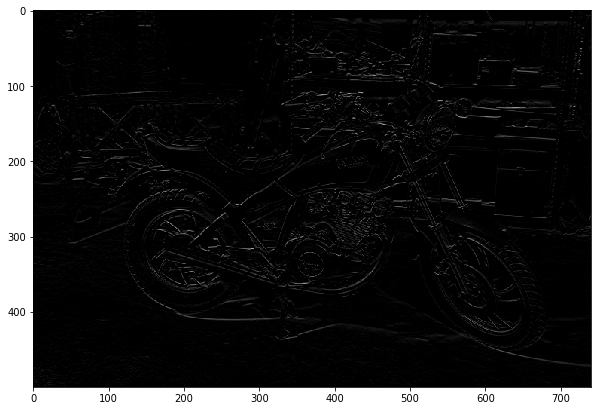

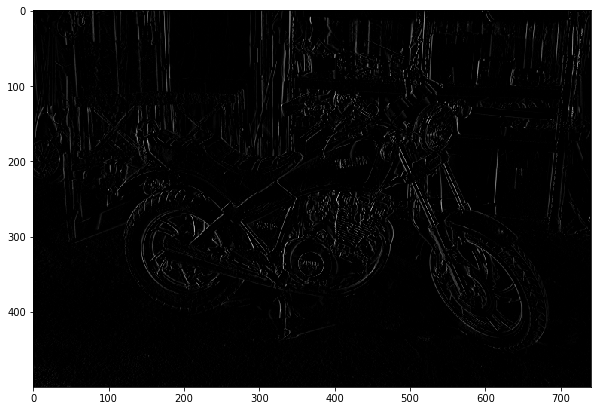

In [13]:
#Check the figures in the lecture notes on piazza to see an example of what the output should be like. 

# Start coding here.
z = img.flatten()
dh_z = d_h.dot(z)
result = dh_z.reshape(m,n)
plt.figure(1, figsize=(10, 10))
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

dv_z = d_v.dot(z)
result = dv_z.reshape(m,n)
plt.figure(1, figsize=(10, 10))
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

## Add noise to the image

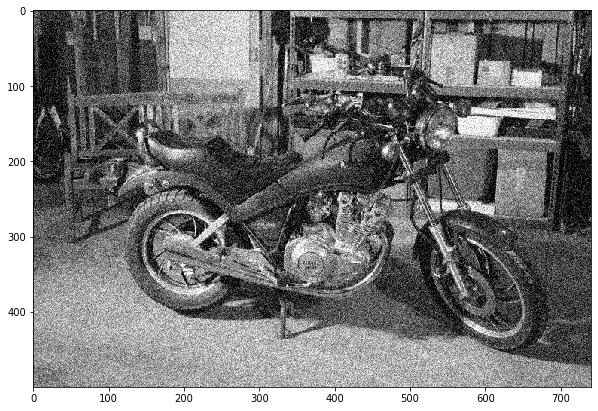

In [15]:
mean_ = 0
standard_deviation = 30
dimensions = (m,n)

noise = np.random.normal(mean_,standard_deviation,dimensions)

noisy_image = img + noise

plt.figure(1, figsize=(10, 10))
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Quetion 3: Denoise the image. Marks: 20/100

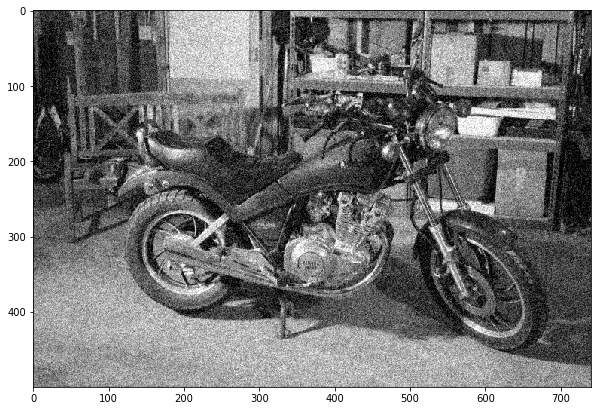

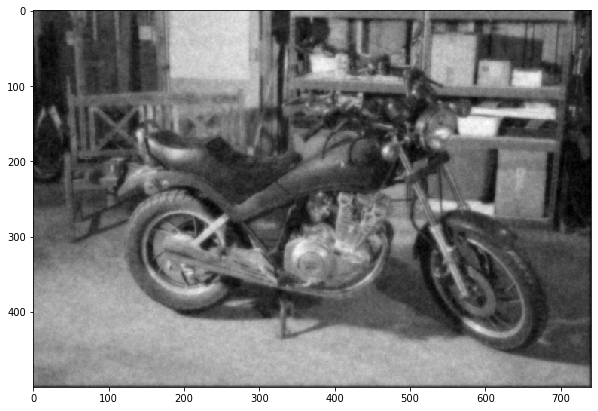

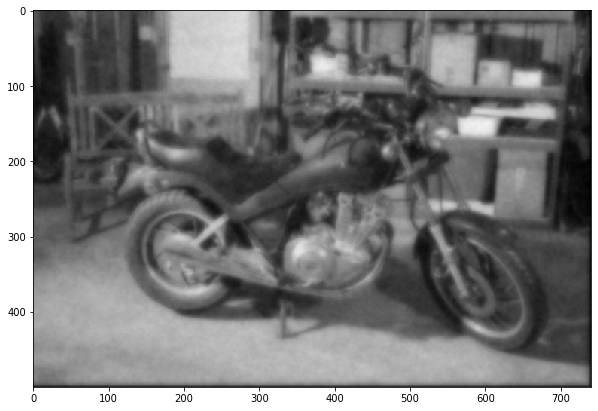

In [22]:
# This method can be used to solve linear systems.
from scipy.sparse.linalg import spsolve
# This module can be used to convert arrays and matrices from complex to real.
from scipy import real

# Use the following lambda list to tune the denoising problem.
lambda_list = [0.1,3,10]

# Start coding here. Check figures in Lecture to see an example of what the output should be like.
z = np.reshape(noisy_image, (m*n,1))
re_D = d_h.transpose().dot(d_h)+d_v.transpose().dot(d_v)
D_i = identity(m*n)
for l in lambda_list:  
    x = spsolve(l*re_D+D_i, z)
    x = np.reshape(x,(m,n))
    plt.figure(1, figsize=(10, 10))
    plt.imshow(x, cmap='gray', vmin=0, vmax=255)
    plt.show()

# Non-programming questions

## Question 4: compute the gradient of the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$, where $x$ consists of $n$ coordinates. The gradient has already been given in the class and you are asked to analytically compute and show any steps for deriving the gradient. Marks: 20/100

## Question 5: compute the second derivative (Hessian matrix) of the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$, where $x$ consists of $n$ coordinates. The Hessian matrix has already been given in the class and you are asked to analytically compute and show any steps for deriving the gradient. Marks: 10/100

## Question 6: prove that the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$ is a convex function. Prove this without using the fact that the objective function is differentiable. Marks: 20/100

## Question 7: You are given a function $f$ that is twice differentiable and not necessarily convex. Explain why if a point $x$ that satisfies $\nabla f(x) = 0$ is not necessarily a local minimizer of function $f$. Hint: use the Taylor expansion $f(y)=f(x) + \nabla f(x)^T (y-x) + (y-x)^T \nabla^2 f(x) (y-x) + \mathcal{o}(\|y-x\|^2_2)$. Note that $\mathcal{o}$ denotes the little-o notation and $\mathcal{o}(\|y-x\|^2_2)$ can be intepreted as a function that goes to zero faster than $\|y-x\|^2_2$. Marks: 15/100